# EDA y PIB en el Tiempo — Subregiones del mundo (1960–2023)



**Librerías:** pandas, numpy, matplotlib, seaborn, scikit-learn, statsmodels.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
sns.set_context('talk')

## Cargar dataset



In [2]:
# Enlace al dataset en GitHub (ejemplo, reemplazar con el tuyo)
url = "https://raw.githubusercontent.com/Seba-RiveraC/AnalisisDatasetPIB_1960-2023/refs/heads/main/countries_gdp_hist.csv"

df = pd.read_csv(url, sep=";")
print("Registros cargados:", len(df))
df.head()

Registros cargados: 13760


,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,ARUBA,INGRESO ALTO,1960,0.000,0.000,0.000
1,ABW,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,ARUBA,INGRESO ALTO,1961,0.000,0.000,0.000
2,ABW,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,ARUBA,INGRESO ALTO,1962,0.000,0.000,0.000
3,ABW,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,ARUBA,INGRESO ALTO,1963,0.000,0.000,0.000
4,ABW,AMERICAS,LATIN AMERICA AND THE CARIBBEAN,CARIBBEAN,ARUBA,INGRESO ALTO,1964,0.000,0.000,0.000


## Analisis inicial de los datos

In [3]:
print("Años:", df['year'].min(), "-", df['year'].max())
print("Países únicos:", df['country_name'].nunique())
print("Subregiones únicas:", df['sub_region_name'].nunique())
print("Income groups únicos:", df['income_group'].nunique())
df.info()

Años: 1960 - 2023
Países únicos: 215
Subregiones únicas: 17
Income groups únicos: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         13760 non-null  object 
 1   region_name          13760 non-null  object 
 2   sub_region_name      13760 non-null  object 
 3   intermediate_region  13760 non-null  object 
 4   country_name         13760 non-null  object 
 5   income_group         13760 non-null  object 
 6   year                 13760 non-null  int64  
 7   total_gdp            13760 non-null  float64
 8   total_gdp_million    13760 non-null  float64
 9   gdp_variation        13760 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.0+ MB


## Parte A — Chile (Intro de medidas estadísticas)



In [4]:
chile = df[df['country_name']=="CHILE"].copy().sort_values('year')
chile[['year','total_gdp']].head()

,year,total_gdp
2176,1960,"4,110,000,000.000"
2177,1961,"4,829,238,095.238"
2178,1962,"5,631,285,444.234"
2179,1963,"5,591,307,028.360"
2180,1964,"5,964,195,925.444"


### Media aritmética del PIB (Chile)

In [5]:
chile['total_gdp'].mean()

np.float64(94857747431.56198)

### *Media ponderada* del PIB (Chile)



In [6]:
weights = chile['year'] - chile['year'].min() + 1
np.average(chile['total_gdp'], weights=weights)

np.float64(147935807890.78748)

### Moda del PIB (Chile)

In [7]:
mode_vals = chile['total_gdp'].mode()
mode_vals.iloc[0] if len(mode_vals)>0 else np.nan

np.float64(4110000000.0)

### Mediana del PIB (Chile)

In [8]:
chile['total_gdp'].median()

41897898390.0394

### Rango (máximo - mínimo) del PIB (Chile)

In [9]:
chile['total_gdp'].max() - chile['total_gdp'].min()

331423331669.219

### Varianza del PIB (Chile)

In [10]:
chile['total_gdp'].var(ddof=1)

1.0989072978952367e+22

### Desviación estándar del PIB (Chile)

In [11]:
chile['total_gdp'].std(ddof=1)

104828779344.95073

### Coeficiente de variación (Chile)

In [12]:
(chile['total_gdp'].std(ddof=1) / chile['total_gdp'].mean())

np.float64(1.1051156303345981)

### Rango intercuartílico (IQR) — Chile

In [13]:
q75, q25 = np.percentile(chile['total_gdp'], [75,25])
q75 - q25

np.float64(156470766793.8639)

### Valores mínimo y máximo del PIB (Chile)

In [14]:
chile['total_gdp'].min(), chile['total_gdp'].max()

(4110000000.0, 335533331669.219)

### Suma y Conteo de observaciones (Chile)

In [15]:
chile['total_gdp'].sum(), chile['total_gdp'].count()

(np.float64(6070895835619.967), np.int64(64))

### Visualizaciones (Chile): Histograma y Boxplot

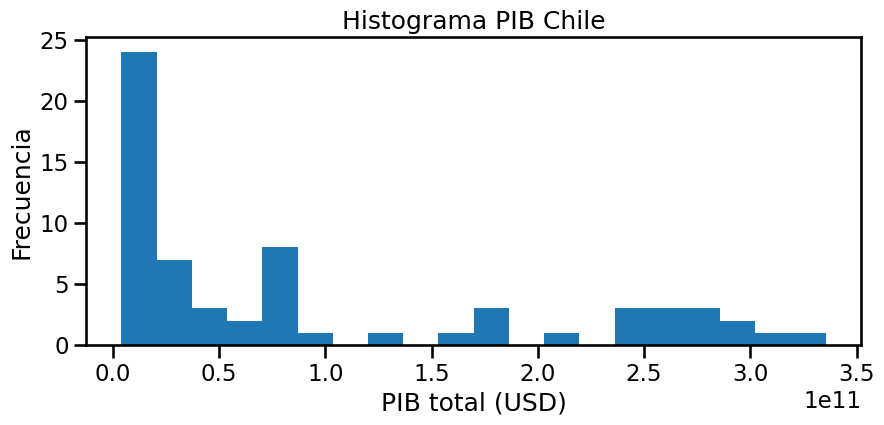

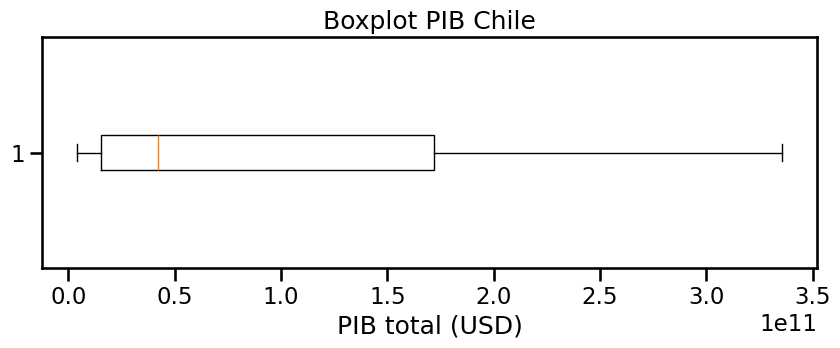

In [16]:
plt.figure(figsize=(10,4))
plt.hist(chile['total_gdp'], bins=20)
plt.title('Histograma PIB Chile')
plt.xlabel('PIB total (USD)'); plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10,3))
plt.boxplot(chile['total_gdp'], vert=False)
plt.title('Boxplot PIB Chile')
plt.xlabel('PIB total (USD)')
plt.show()

# Parte B — **Subregiones** (Análisis principal)

En esta sección se analiza por **subregión** y **año** para estudiar el crecimiento del PIB (suma del PIB de sus países).  



In [17]:
# Agregación por subregión y año
sub_df = df.groupby(['sub_region_name','year'])['total_gdp'].sum().reset_index()
sub_df.head()

,sub_region_name,year,total_gdp
0,AUSTRALIA AND NEW ZEALAND,1960,"24,143,781,583.522"
1,AUSTRALIA AND NEW ZEALAND,1961,"25,405,998,267.722"
2,AUSTRALIA AND NEW ZEALAND,1962,"26,056,841,992.312"
3,AUSTRALIA AND NEW ZEALAND,1963,"28,240,705,389.094"
4,AUSTRALIA AND NEW ZEALAND,1964,"31,141,890,549.121"


## Tendencias visuales por subregión

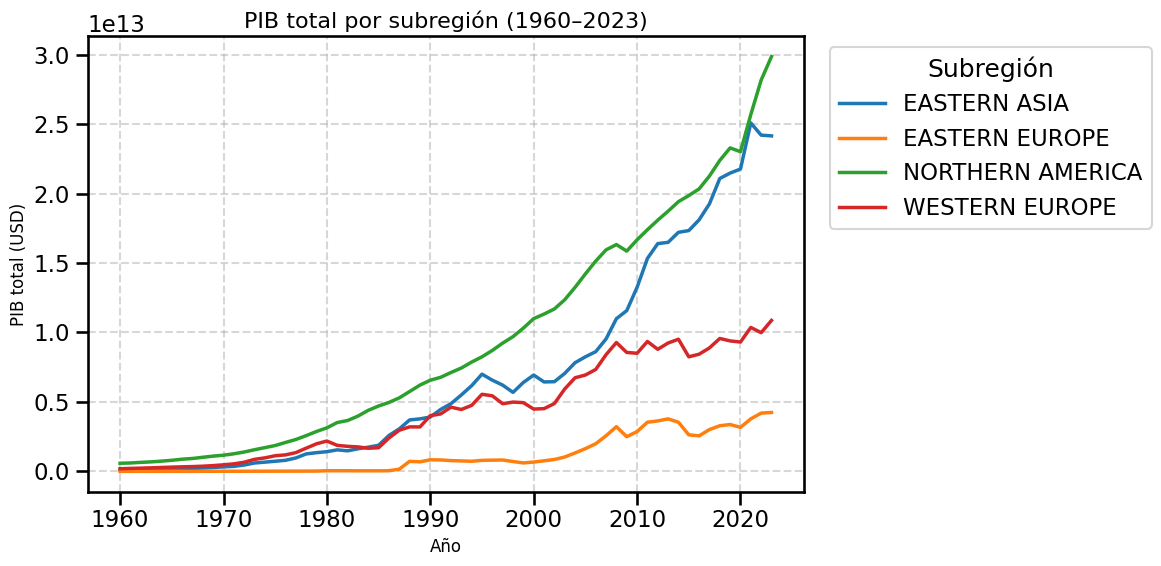

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subregiones a mostrar
selected_regions = [
    'WESTERN EUROPE',
    'EASTERN EUROPE',
    'EASTERN ASIA',
    'NORTHERN AMERICA'
]

# Filtrar solo esas regiones
filtered_df = sub_df[sub_df['sub_region_name'].isin(selected_regions)]

# Crear gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='year', y='total_gdp', hue='sub_region_name', linewidth=2.5)

# Título y etiquetas
plt.title('PIB total por subregión (1960–2023)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('PIB total (USD)', fontsize=12)

# Escala logarítmica opcional (descomenta si hay mucha diferencia)
# plt.yscale('log')

# Leyenda fuera del gráfico
plt.legend(title='Subregión', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Regresión lineal por subregión (PIB ~ año) + Ranking

In [19]:
results = []
models = {}

for region, data_region in sub_df.groupby('sub_region_name'):
    X = data_region[['year']]
    y = data_region['total_gdp']
    lr = LinearRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)
    r2 = r2_score(y, y_pred)
    coef = lr.coef_[0]
    intercept = lr.intercept_

    results.append({
        'sub_region': region,
        'coef_year': coef,
        'intercept': intercept,
        'r2': r2,
        'avg_gdp': y.mean(),
        'final_year': int(data_region['year'].iloc[-1]),
        'final_gdp': y.iloc[-1]
    })
    models[region] = {'lr': lr, 'data': data_region, 'y_pred': y_pred}

results_df = pd.DataFrame(results).sort_values('coef_year', ascending=False).reset_index(drop=True)
results_df

,sub_region,coef_year,intercept,r2,avg_gdp,final_year,final_gdp
0,NORTHERN AMERICA,"417,908,206,974.996","-822,956,702,341,005.250",0.921,"9,307,491,849,698.984",2023,"29,871,321,614,401.359"
1,EASTERN ASIA,"366,388,717,609.021","-722,730,340,809,879.625",0.842,"6,932,790,308,486.213",2023,"24,159,011,120,348.066"
2,WESTERN EUROPE,"181,649,037,706.349","-357,351,265,495,923.062",0.949,"4,402,793,096,270.596",2023,"10,869,055,539,839.234"
3,LATIN AMERICA AND THE CARIBBEAN,"106,273,794,617.060","-209,446,198,466,853.938",0.851,"2,198,063,513,020.828",2023,"6,596,563,248,893.703"
4,NORTHERN EUROPE,"99,523,077,891.323","-195,948,226,213,861.125",0.931,"2,251,983,406,708.009",2023,"5,903,706,384,301.207"
5,SOUTHERN EUROPE,"84,993,812,506.277","-167,265,550,595,084.594",0.916,"1,999,627,011,166.899",2023,"4,788,999,320,625.315"
6,EASTERN EUROPE,"66,442,958,533.233","-131,169,316,976,933.422",0.793,"1,151,834,941,999.805",2023,"4,239,464,641,772.966"
7,SOUTHERN ASIA,"65,746,135,531.976","-129,737,836,617,941.297",0.756,"1,195,592,293,988.422",2023,"4,896,593,845,298.898"
8,WESTERN ASIA,"61,954,992,267.365","-122,234,814,440,598.141",0.803,"1,148,552,659,859.985",2023,"4,225,513,657,419.533"
9,SOUTH-EASTERN ASIA,"53,292,441,106.272","-105,206,585,914,224.188",0.771,"925,310,548,916.370",2023,"3,796,280,494,250.132"


#Datos del analisis

In [20]:
top_growth = results_df.iloc[0]
low_growth = results_df.iloc[-1]
best_fit = results_df.sort_values('r2', ascending=False).iloc[0]

print(f"• Subregión con **mayor crecimiento anual estimado**: {top_growth['sub_region']} "
      f"(coef_year = {top_growth['coef_year']:.3e} USD/año, R² = {top_growth['r2']:.3f}).")

print(f"• Subregión con **menor crecimiento**: {low_growth['sub_region']} "
      f"(coef_year = {low_growth['coef_year']:.3e} USD/año, R² = {low_growth['r2']:.3f}).")

print(f"• Subregión con **mejor ajuste lineal** (patrón más estable): {best_fit['sub_region']} "
      f"(R² = {best_fit['r2']:.3f}, coef_year = {best_fit['coef_year']:.3e}).")

• Subregión con **mayor crecimiento anual estimado**: NORTHERN AMERICA (coef_year = 4.179e+11 USD/año, R² = 0.921).
• Subregión con **menor crecimiento**: MICRONESIA (coef_year = 1.495e+08 USD/año, R² = 0.696).
• Subregión con **mejor ajuste lineal** (patrón más estable): WESTERN EUROPE (R² = 0.949, coef_year = 1.816e+11).


## Gráficos de ajuste lineal por subregión

Se muestran el PIB observado (puntos/líneas) y la **recta estimada** por la regresión lineal (`total_gdp ~ year`).

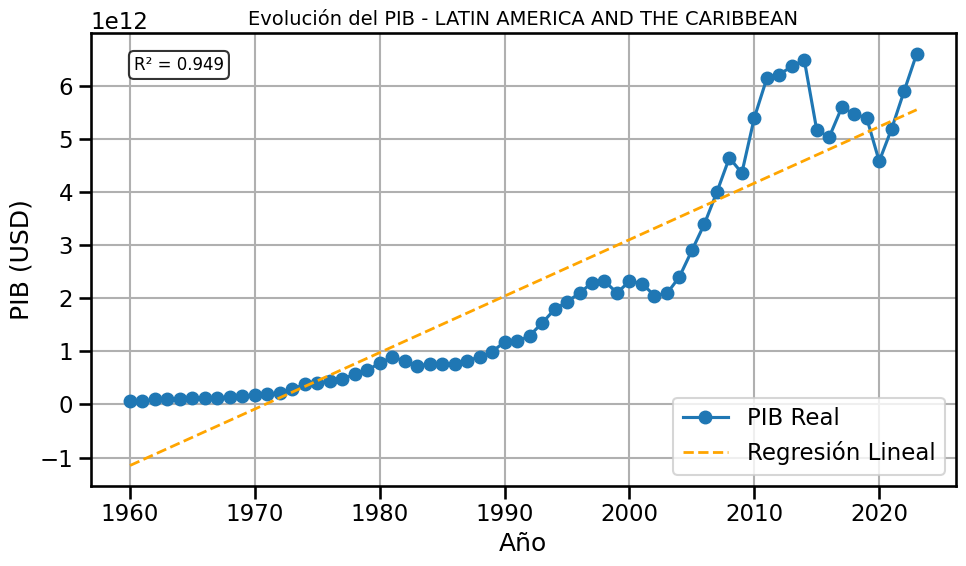

In [37]:
import matplotlib.pyplot as plt

# Región a graficar (elige una de la lista que diste)
region = 'LATIN AMERICA AND THE CARIBBEAN'

# Obtener los datos y modelo de la región
reg = models[region]
d = reg['data'].copy()
y_pred = reg['y_pred']

# Añadir la predicción al DataFrame
d['y_pred'] = y_pred

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos reales
ax.plot(d['year'], d['total_gdp'], label='PIB Real', marker='o')

# Graficar la predicción lineal
ax.plot(d['year'], d['y_pred'], label='Regresión Lineal', linestyle='--', linewidth=2, color='orange')

# Mejorar visualmente el gráfico
ax.set_title(f'Evolución del PIB - {region}', fontsize=14)
ax.set_xlabel('Año')
ax.set_ylabel('PIB (USD)')
ax.legend()
ax.grid(True)

# Mostrar R² dentro del gráfico (arriba a la izquierda)
ax.text(0.05, 0.95, f'R² = {r2:.3f}', transform=ax.transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()




## Lista de subregiones

    AUSTRALIA AND NEW ZEALAND
    CENTRAL ASIA
    EASTERN ASIA
    EASTERN EUROPE
    LATIN AMERICA AND THE CARIBBEAN
    MELANESIA
    MICRONESIA
    NORTHERN AFRICA
    NORTHERN AMERICA
    NORTHERN EUROPE
    POLYNESIA
    SOUTH-EASTERN ASIA
    SOUTHERN ASIA
    SOUTHERN EUROPE
    SUB-SAHARAN AFRICA
    WESTERN ASIA
    WESTERN EUROPE
